# importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# data collection and processing

In [ ]:
#loading dataset

calories = pd.read_csv('/content/calories1.csv')

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231
1,14861698,66
2,11179863,26
3,16180408,71
4,17771927,35


In [ ]:
exercise_data = pd.read_csv('/content/exercise1.csv')

In [ ]:
exercise_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# combining two dataframe

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis =1

                          )

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# check no. of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# getting info about data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#check for missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


# statistical measure

In [ ]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# data visualization

In [ ]:
sns.set(

)

<Axes: xlabel='count', ylabel='Gender'>

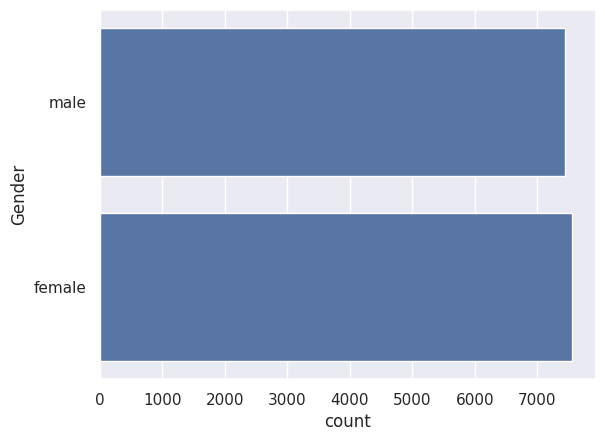

In [ ]:
# plotting gender column in count plot

sns.countplot(calories_data['Gender'])

/tmp/ipython-input-2967126719.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

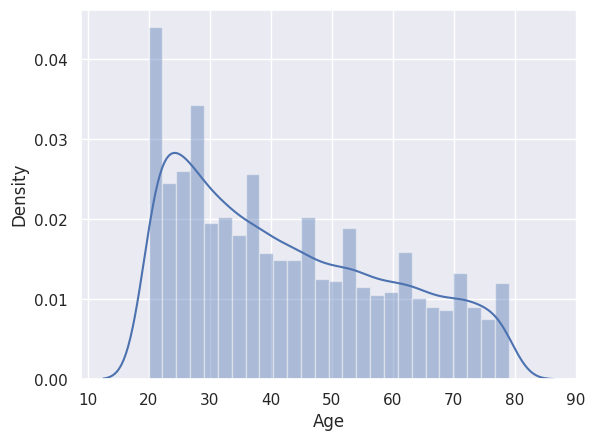

In [ ]:
# finding the distribution of age column
sns.distplot(calories_data['Age'])

/tmp/ipython-input-1148228354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

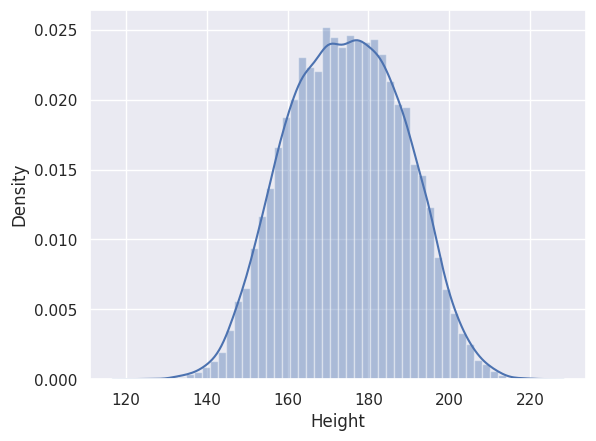

In [ ]:
# finding the distribution of height column
sns.distplot(calories_data['Height'])

/tmp/ipython-input-2844413077.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

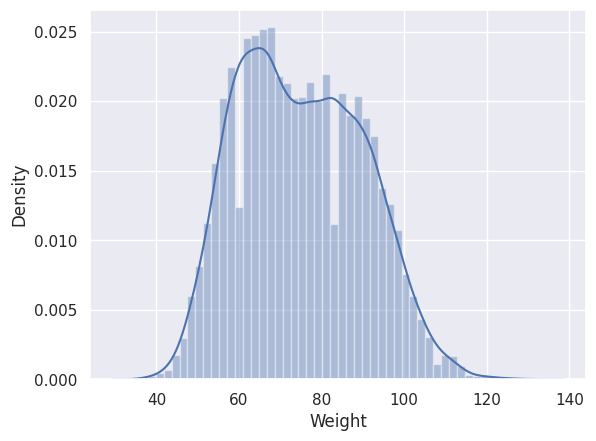

In [ ]:
# finding the distribution of weight column
sns.distplot(calories_data['Weight'])

/tmp/ipython-input-1051540783.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

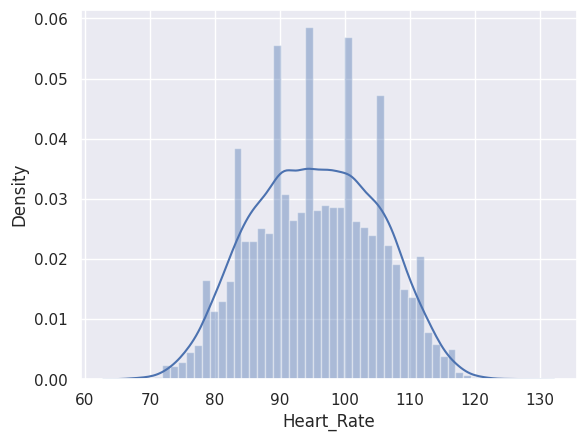

In [ ]:
# finding the distribution of heart rate column
sns.distplot(calories_data['Heart_Rate'])

/tmp/ipython-input-2516979509.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

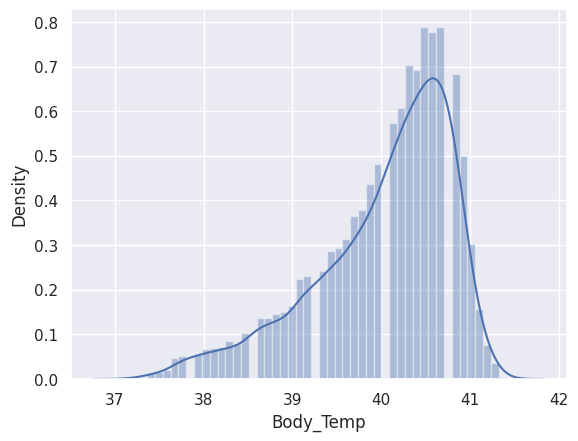

In [ ]:
# finding the distribution of body temperature column
sns.distplot(calories_data['Body_Temp'])

# correlation in dataset

In [ ]:
# Drop the 'User_ID' column
calories_data = calories_data.drop('User_ID', axis=1)

# Convert 'Gender' column to numerical using one-hot encoding
calories_data['Gender'] = calories_data['Gender'].map({'male': 0, 'female': 1})

correlation = calories_data.corr()

# construct heat map

<Axes: >

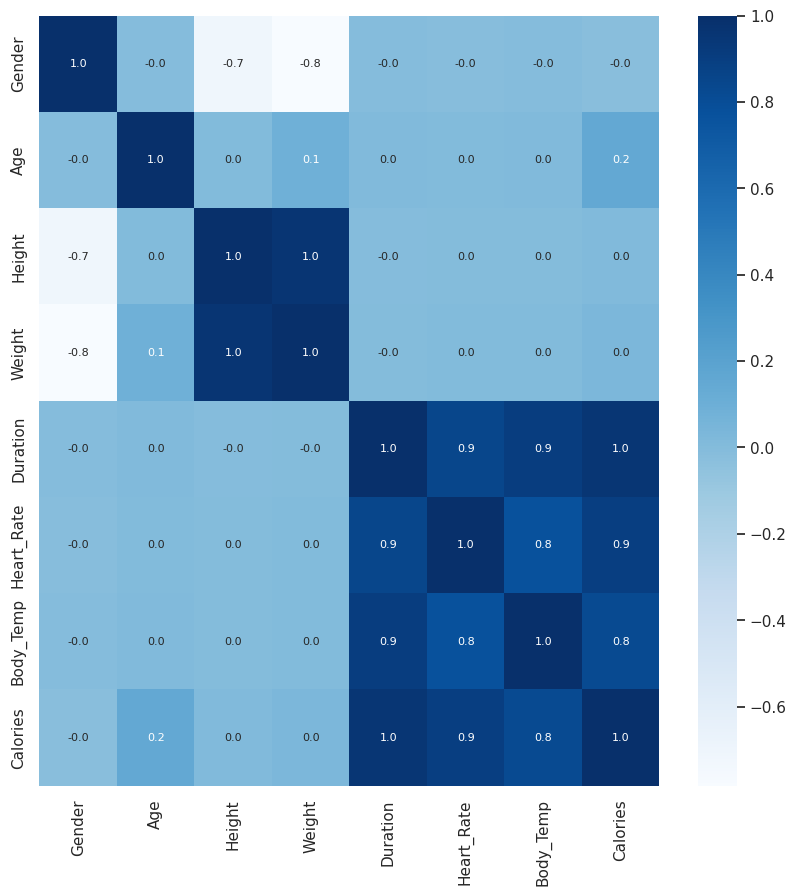

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar =True, fmt ='.1f' ,annot = True , annot_kws = {'size':8}, cmap ='Blues')

# converting test data to numerical data

In [ ]:
calories_data.replace({"Gender:{'male' : 0 ,'female' : 1}, inplace= True"})

/tmp/ipython-input-3210671358.py:1: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  calories_data.replace({"Gender:{'male' : 0 ,'female' : 1}, inplace= True"})


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


# separating feature and target

In [ ]:
x = calories_data.drop(columns = ['Calories'] , axis = 1)
y = calories_data['Calories']

In [ ]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


# split data into training and test data

In [ ]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.2, random_state =2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


# model training

XGBoost Regressor

In [ ]:
# load model
model = XGBRegressor()

In [ ]:
#training the model
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# model evaluation

In [ ]:
test_data_prediction = model.predict(x_test)

In [ ]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


# mean absolute error

In [ ]:
mae = metrics.mean_absolute_error(y_test,test_data_prediction)

In [ ]:
print('Mean Absolute Error = ' , mae)

Mean Absolute Error =  1.4833678883314132


predictive system

In [ ]:
input_data = (1,34,179.0,71.0,13.0,100.0,40.5
)
# changing  input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print(' calories burnt' , prediction[0] )

[70.502846]
 calories burnt 70.502846
